# **🚲 Bike Sharing Data Analytics & Strategic Insights**
- **Author:** Fatwa Nurhidayat
- **Email:** fatwa.nrhdyt@student.ub.ac.id

## **1. Executive Summary & Project Scope**

In the rapidly growing micromobility sector, efficient fleet management is highly dependent on accurately forecasting user demand. This project analyzes a comprehensive Bike Sharing dataset to uncover actionable operational insights. 

The primary analytical objectives are:
1. **Temporal Utilization Analysis:** To identify peak and off-peak hours for bike utilization, enabling optimized fleet availability and rebalancing strategies.
2. **Environmental & Seasonal Impact:** To determine how seasonal changes, temperature variations, and weather conditions dictate rental demands, aiding in inventory forecasting and maintenance scheduling.

## **2. Environment Setup & Dependencies**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Streamlit version:", st.__version__)

Pandas version: 2.2.1
Matplotlib version: 3.8.4
Seaborn version: 0.12.2
Streamlit version: 1.30.0


## **3. Data Ingestion & Profiling**

### **3.1. Loading the Datasets**

In [3]:
day = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

In [4]:
print("Dataset: Daily Granularity")
display(day.head())

Dataset: Daily Granularity


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print("Dataset: Hourly Granularity")
display(hour.head())

Dataset: Hourly Granularity


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insights:**
- The datasets cover historical log data from 2011 to 2012.
- The `day.csv` dataset provides a macro view with **731 records**, while `hour.csv` provides micro-level granularity with **17,379 records**, separated by the `hr` (hour) dimension.

### **3.2. Data Quality Assessment (`day.csv`)**

In [7]:
# checking data types
print("--- Data Types ---")
print(day.dtypes)

--- Data Types ---
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
# checking for missing values
print("\n--- Missing Values ---")
print(day.isnull().sum())


--- Missing Values ---
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# checking for duplicates
print("\n--- Duplicated Records ---")
print(f"Duplicates found: {day.duplicated().sum()}")


--- Duplicated Records ---
Duplicates found: 0


**Insights:**
- The dataset is structurally sound with **zero missing values** and **zero duplicate records**.
- The `dteday` column is currently stored as an *object* (string) and must be converted to *datetime* for time-series operations.

### **3.3. Anomaly & Outlier Detection (`day.csv`)**

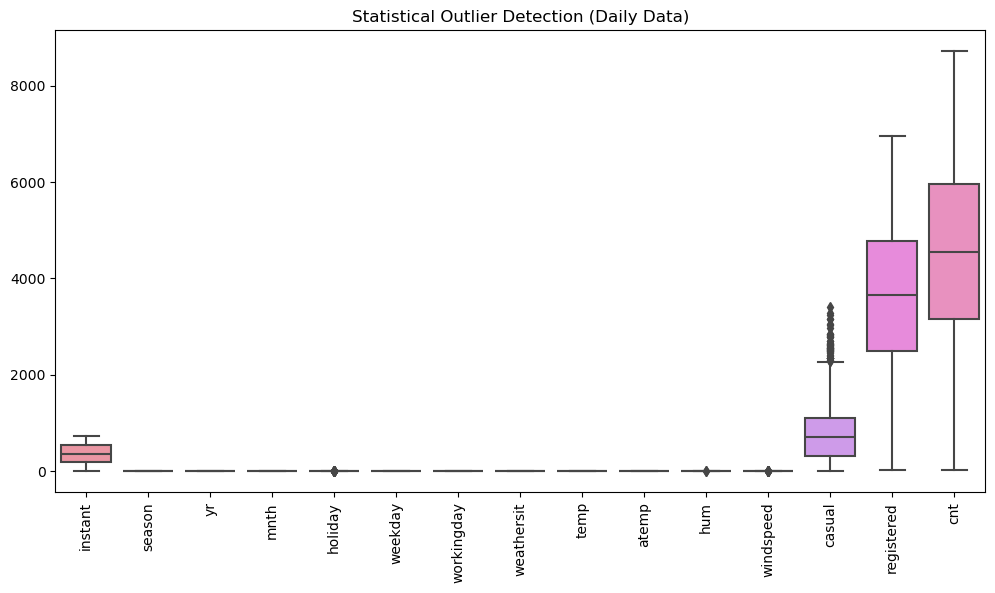

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=day.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Statistical Outlier Detection (Daily Data)")
plt.show()

**Insights:**
- The `holiday` column flags "outliers", but these are genuine public holidays (value "1"), which naturally occur infrequently. This will be resolved via categorical mapping.
- The `hum` (humidity), `windspeed`, and `casual` columns contain genuine statistical outliers. To preserve the dataset's integrity without dropping valuable temporal data, we will apply **Winsorization** to cap extreme values.

### **3.4. Data Quality Assessment (`hour.csv`)**

In [11]:
# checking data types
print("--- Data Types ---")
print(hour.dtypes)

--- Data Types ---
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [12]:
# checking for missing values
print("\n--- Missing Values ---")
print(hour.isnull().sum())


--- Missing Values ---
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
# checking for duplicates
print("\n--- Duplicated Records ---")
print(f"Duplicates found: {hour.duplicated().sum()}")


--- Duplicated Records ---
Duplicates found: 0


**Insights:**
- The `hour.csv` dataset exhibits identical structural anomalies and will undergo the exact same preprocessing pipeline.

### **3.5. Anomaly & Outlier Detection (`hour.csv`)**

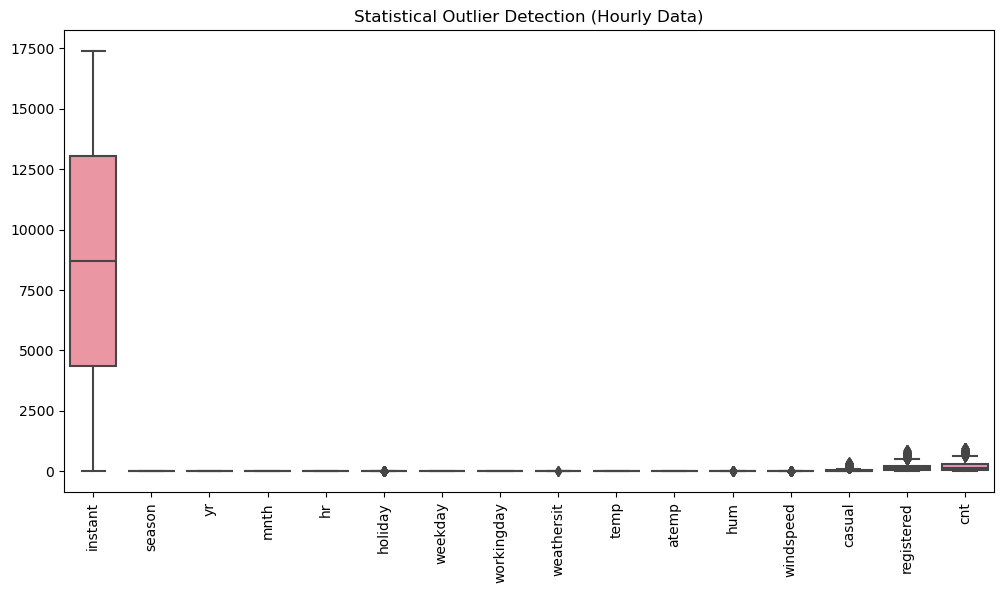

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hour.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Statistical Outlier Detection (Hourly Data)")
plt.show()

**Insights:**
- The `holiday` and `weathersit` columns flag statistical "outliers" (e.g., `weathersit` value "4" representing severe weather conditions). However, these are genuine, albeit rare, categorical events rather than data entry errors. This will be seamlessly resolved via categorical mapping.
- The `hum`, `windspeed`, `casual`, `registered`, and `cnt` columns exhibit genuine statistical outliers representing extreme weather spikes or unprecedented rental surges. To preserve the dataset's chronological integrity and avoid dropping valuable temporal data, we will apply **Winsorization** to cap these extreme values at their respective statistical bounds.

## **4. Data Preprocessing & Feature Engineering**

### **4.1. Processing Daily Data (`day.csv`)**

In [ ]:
# 1. Correcting Data Types
day['dteday'] = pd.to_datetime(day['dteday'])

In [17]:
# 2. Handling Outliers via Winsorization
features_to_winsorize = ['hum', 'windspeed', 'casual']

for feature in features_to_winsorize:
    Q1 = day[feature].quantile(0.25)
    Q3 = day[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values at lower and upper bounds
    day[feature] = day[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [18]:
# 3. Categorical Mapping for Business Readability
day['season'] = day['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
day['holiday'] = day['holiday'].map({0: 'no', 1: 'yes'})
day['weekday'] = day['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
day['workingday'] = day['workingday'].map({0: 'no', 1: 'yes'})
day['weathersit'] = day['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'rain', 4: 'heavy rain'})

In [19]:
# 4. Dropping Redundant Features
day = day.drop(columns=['yr', 'mnth'])

### **4.2. Processing Hourly Data (`hour.csv`)**

In [20]:
# 1. Correcting Data Types
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [21]:
# 2. Handling Outliers via Winsorization
features_to_winsorize_hr = ['hum', 'windspeed', 'casual', 'registered', 'cnt']

for feature in features_to_winsorize_hr:
    Q1 = hour[feature].quantile(0.25)
    Q3 = hour[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hour[feature] = hour[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [22]:
# 3. Categorical Mapping
hour['season'] = hour['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
hour['holiday'] = hour['holiday'].map({0: 'no', 1: 'yes'})
hour['weekday'] = hour['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
hour['workingday'] = hour['workingday'].map({0: 'no', 1: 'yes'})
hour['weathersit'] = hour['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'rain', 4: 'heavy rain'})

In [23]:
# 4. Dropping Redundant Features
hour = hour.drop(columns=['yr', 'mnth'])

### **4.3. Exporting Production Data**
Exporting the fully cleaned datasets to power the interactive Streamlit dashboard.

In [24]:
day.to_csv("day_clean.csv", index=False)
hour.to_csv("hour_clean.csv", index=False)
print("Pipeline successful: Clean datasets exported as 'day_clean.csv' and 'hour_clean.csv'.")

Pipeline successful: Clean datasets exported as 'day_clean.csv' and 'hour_clean.csv'.


## **5. Exploratory Data Analysis (EDA) & Insights**

### **5.1. Temporal Analysis: Hourly Utilization Trends**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


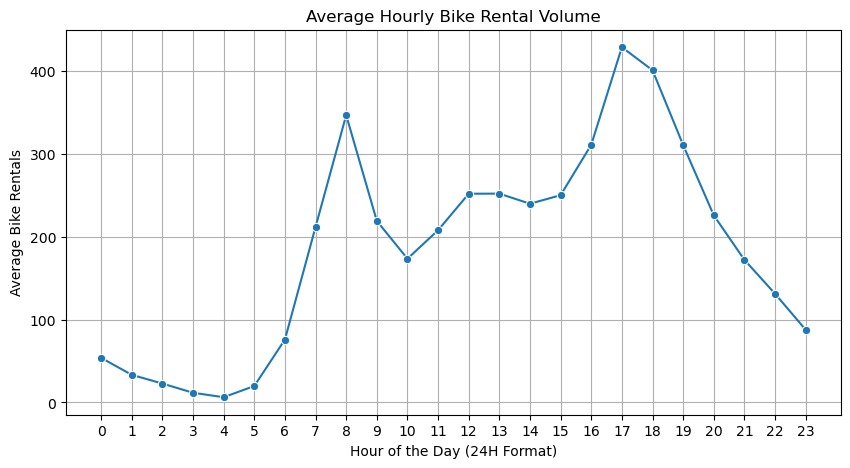

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour, x='hr', y='cnt', estimator='mean', errorbar=None, marker='o', color="#1f77b4")
plt.xlabel("Hour of the Day (24H Format)")
plt.ylabel("Average Bike Rentals")
plt.title("Average Hourly Bike Rental Volume")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insights:**
- **Peak Commute Hours:** Massive demand spikes occur precisely at **08:00 AM** and between **05:00 PM - 06:00 PM** (17:00-18:00). This perfectly aligns with corporate and academic commuting schedules.
- **Off-Peak Operations:** Absolute lowest activity falls between midnight and 05:00 AM, presenting an optimal window for physical fleet maintenance.
- **Mid-Day Baseline:** Following the morning rush, rental volume stabilizes at a moderate baseline from 10:00 AM to 03:00 PM.

### **5.2. Environmental Analysis: Seasonal Impact**

In [26]:
# aggregate data by season
seasonal_usage = day.groupby('season')['cnt'].sum().reset_index()
season_order = ['winter', 'spring', 'summer', 'fall']
seasonal_usage['season'] = pd.Categorical(seasonal_usage['season'], categories=season_order, ordered=True)
seasonal_usage = seasonal_usage.sort_values('season')

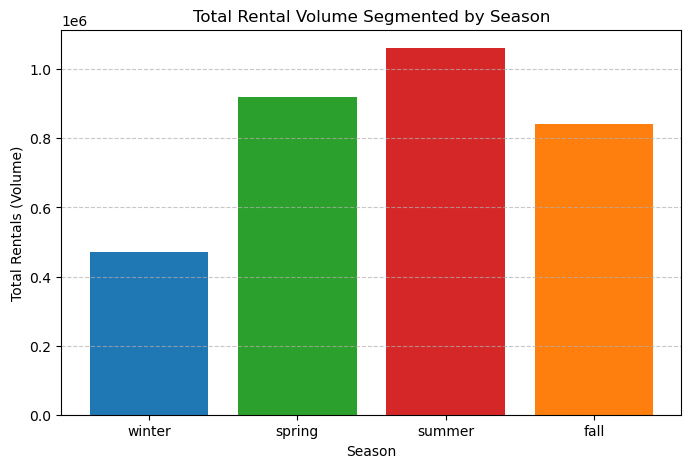

In [27]:
# visualization
plt.figure(figsize=(8, 5))
plt.bar(seasonal_usage['season'], seasonal_usage['cnt'], color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'])
plt.title("Total Rental Volume Segmented by Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals (Volume)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**
- **Summer Peak:** Summer drives the absolute highest volume of rentals, propelled by warmer weather and recreational holidays.
- **Winter Contraction:** Winter predictably yields the lowest rental volumes due to harsh riding conditions.
- **Transitional Stability:** Fall and Spring maintain robust usage, acting as healthy transitional periods.

## **6. Advanced Feature Engineering**

To extract deeper environmental correlations, we engineer a categorical temperature feature (`temp_category`) from the continuous normalized temperature data.

In [28]:
# define operational temperature bins
bins = [0, 0.3, 0.6, 1]
labels = ["cold", "moderate", "hot"]

In [29]:
# feature extraction
day["temp_category"] = pd.cut(day["temp"], bins=bins, labels=labels)

In [30]:
# aggregate usage
usage_by_temp = day.groupby("temp_category", observed=False)["cnt"].sum().reset_index()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


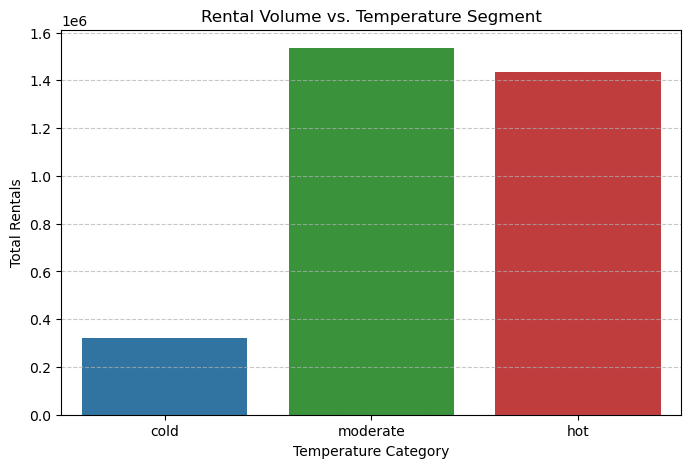

In [31]:
# visualization
plt.figure(figsize=(8, 5))
sns.barplot(x="temp_category", y="cnt", data=usage_by_temp, palette=["#1f77b4", "#2ca02c", "#d62728"])
plt.title("Rental Volume vs. Temperature Segment")
plt.xlabel("Temperature Category")
plt.ylabel("Total Rentals")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insights:**
- **The "Moderate" Sweet Spot:** Optimal temperature conditions generate the highest overall ridership.
- **Extreme Heat Resilience:** Despite high temperatures, the "hot" category sustains highly robust volumes, indicating users are relatively tolerant of heat compared to cold.
- **Cold Weather Deterrence:** Cold temperatures drastically suppress the willingness to rent bikes.

## **7. Strategic Recommendations**

Based on the quantitative analysis, the following actionable business strategies are recommended:

1. **Proactive Fleet Rebalancing:** The data definitively proves that bike rentals peak sharply at 08:00 AM and 17:00 PM. Fleet management operations (e.g., redistributing bikes from residential areas to transit hubs, or swapping e-bike batteries) must be executed *prior* to these critical time windows (e.g., at 07:00 AM and 16:00 PM) to prevent stock-outs and maximize revenue.

2. **Seasonally-Adjusted Maintenance Schedules:**
   Summer generates peak revenue, while winter sees a massive drop-off. The company should capitalize on the winter demand contraction to perform fleet-wide mechanical overhauls. Conversely, 100% of the active fleet must be operational and deployed during the summer months to capture maximum profit.

3. **Dynamic Pricing Integration:**
   Since ridership plummets in cold conditions but remains highly resilient in hot weather, dynamic pricing should be implemented. Targeted discounts or extended ride times should be automatically triggered during cold snaps to stabilize revenue, while standard or surge pricing can be maintained during moderate/hot conditions to capitalize on organic demand.